# SCS 3546: Deep Learning
> Assignment 1: Deep Learning Using Keras

### Your name & student number:

<pre> Assal Nekoufar </pre>

<pre> Student Number: X589579 </pre>

## Assignment Description

In this assignment you will demonstrate your ability to:

- Train a neural network using Keras to solve a regression problem.

- Perform sensible data preprocessing.

- Experiment with hyperparemter tuning and different model architectures to achieve best performance.



### Grade Allocation

**15 points total**

- Part 1: 4 Marks
- Part 2: 9 Marks
- Clarity: 2 Marks

The marks for clarity are awarded for code documentation and how well you explained/supported your answers, including the use of visualizations where appropriate.

In [ ]:
# OPTIONAL : For model evaluation and for those who choose to use the KerasRegressor from keras.wrappers, you would need to install tensorflow 2.12 or 2.11.another option is to use the scikeras.
# please note that you may have many options and the below libraries are just meant to help you and to provide options

# !pip install tensorflow==2.12
# from keras.wrappers.scikit_learn import KerasRegressor

## !pip install scikeras
## from scikeras.wrappers import KerasClassifier, KerasRegressor


In [39]:
# setting up the notebook with important libraries
random_state = 42
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preamble

### Hyperparameters

A hyperparameter is a parameter whose value is set before the learning process begins.

Some important Neural Networks hyperparameters include:

- number of hidden layers
- number of neurons
- learning rate
- activation function
- optimizer settings

Hyperparameters are crucial to the performance, speed, and quality of the machine learning models.

Through Hyper parameter optimization, we find a tuple (best combination) of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data.

Important hyperparameters that could be tuned include:

- num_hidden_layers
- neurons_per_layer
- dropout_rate
- activation
- optimizer
- learning_rate
- batch_size

### Loss Function

- MSE (Mean Squared Error) is used as the score/loss function that will be minimized for hyperparameter optimization.
- In this assignment, we are going to use Cross-Validation to calculate the score (MSE) for a given set of hyperparameter values

- MSE is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem; for example, in this assignment it translates to thousands of dollars

- Note: Your results may vary given the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision

## Dataset

We will be using mock data for this assignment. the outcome is the sale price for some products. we have created 13 features to predict the sale price.

- import provided mock data into your notebook.

- You are **not** expected to perform Exploratory Data Analysis (EDA) on this dataset.

- For the purpose of this assignment, your model's performance is not an important factor by itself - that is how far your sale price prediction is. The important factor is the changes that you observe when changing model architectures.

- The information that follow are meant to be optional and to help you get familiar with the data. Your efforts on this assignment should focus on **model training and hyperparameter tuning**, not on EDA.


# Assignment Start
***

- Please follow all instructions carefully.

- Use MSE (Mean Squared Error) as the score/loss function that will be minimized during optimization.








#Data Import

The code below imports the data for you as dataframe, then you may need to convert it to numpy arrays.  

In [60]:
# You can use the code below to import the data
# Option 3 - from local using the files that are available
## Imports pandas, which you’ll use to load and manipulate CSV data.
import pandas as pd

# mount the colab
from google.colab import drive
drive.mount('/content/drive')

# Next, You need to upload tables to your G drive -  then you may need to update paths below
# load the  data into a pandas dataframe for easy viewing and manipulation
df_train_y = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_Assignments/y_train.csv", index_col=0)
df_test_y = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_Assignments/y_test.csv", index_col=0)
df_train_x = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_Assignments/X_train.csv", index_col=0)
df_test_x = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_Assignments/X_test.csv", index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
## Let's look at data
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [62]:
## Let's look at shape of the data
df_train_x.shape

(404, 13)

# Part 1: Impact of Changing Model Architecture

In this section, we will be comparing a simple single-layer baseline model with two other models having a different network topology.

## a) Baseline model [2 points]

Use Keras to develop a baseline neural network model that has **one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons).**

Make sure to **standardize** your features (i.e. subtract mean and divide by standard deviation) before training your model. You can also perform any other data-preprocessing that you deem necessary.

- Note: No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transformation.

- The ADAM optimization algorithm should be used to optimize mean squared error loss function.

- Plot learning curves and report on both training and validation performance.

Baseline Model Architecture:
Input(13 features)-->Dense(13, activation="relu")-->Dense(1)

Summary of Steps:

1- Load dataset.

2- Split into train/val/test.

3- Standardize features.

4- Build model: Input → Dense(13, relu) → Dense(1).

5- Compile with Adam + MSE.

6- Train model with training data.

7- Plot learning curves.

8- Report train/validation MSE.

9- Evaluate the model on the test set.

In [63]:
# Additional Data preprocessing
# Convert y to 1D array
train_y = df_train_y.iloc[:,0]
test_y = df_test_y.iloc[:,0]

# Split the training sets to training + validation
train_X, val_X, train_y, val_y = train_test_split(df_train_x, train_y, test_size=0.2, random_state=42)

In [64]:
# Hint : to make it easier, you may try to standardize your data upfront
## Neural networks train better when input data is standardized. This ensures each feature has mean 0 and std 1. We have to make sure split happens before standardization.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_val_scaled = scaler.transform(val_X)
X_test_scaled = scaler.transform(df_test_x)

In [13]:
# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of course content

In [65]:
# Let's Build the Baseline Keras Model
model = Sequential([
    Dense(13, activation = "relu", input_shape=(13,)),
    Dense(1) #as this is a regression model we don't need any activation functions
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Compile the keras Model
model.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])

In [67]:
# Let's train the model
history = model.fit(
    X_train_scaled, train_y,
    validation_data = (X_val_scaled, val_y),
    epochs = 100,
    batch_size=32,
    verbose = 1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 633.3987 - mse: 633.3987 - val_loss: 489.4673 - val_mse: 489.4673
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 639.4337 - mse: 639.4337 - val_loss: 483.5779 - val_mse: 483.5779
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 655.3358 - mse: 655.3358 - val_loss: 477.7538 - val_mse: 477.7538
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 617.1135 - mse: 617.1135 - val_loss: 471.8219 - val_mse: 471.8219
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 607.3583 - mse: 607.3583 - val_loss: 465.6930 - val_mse: 465.6930
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 585.0337 - mse: 585.0337 - val_loss: 459.3794 - val_mse: 459.3794
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 605.7178 - mse: 605.7178 - val_loss: 452.8969 - val_mse: 452.8969
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 568.9727 - mse: 568.9727 - val_loss: 446.3247 - val_mse: 446.324

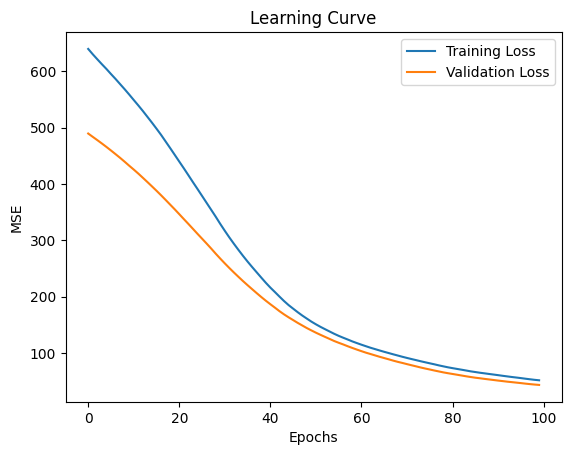

In [68]:
# Let's plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [71]:
# Let's evaluate the model
test_mse = model.evaluate(X_test_scaled,test_y, verbose = 0)
print(test_mse)

[57.22772979736328, 57.22772979736328]


## b) Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [ ]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content


## c) Wider Network [1 point]

Construct and evaluate a wider model with more neurons (e.g. 32, 16).

In [ ]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

# Part 2: Hyperparameter Tuning Experiments

In the following experiments, you will evaluate and compare models trained with different hyperparameters. Please follow the specifications given for each model.

## a) Model 1 [2 points]

- 2 Dense layers:
  - The first with 64 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [ ]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## b) Model 2 [2 points]

- 2 Dense layers:
  - The first with 128 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [ ]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## c) Model 3 [2 points]

- Same as Model 2, but use tanh activation functions instead of relu.

In [ ]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## d) Model 4 [2 points]

- Same as Model 2, but use the rmsprop optimizer when training.

In [ ]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## e) Model Comparison [1 point]

Which model performed best? Offer your thoughts on why the particular choice of hyperparameters led to improved performance for this model.

In [ ]:
# explain WHY you think the best model was better than the rest, in terms
# of how those hyperparameters theoretically impact the model

# provide visualizations (e.g. tables or comparison plot) to support your response where possible

NOTE: 2 additional points are awarded based on code documentation and overall clarity of work.

In [ ]:
# We are looking for a clear explanation of results with each response. We want you to attempt to
# explain the _how_ and _why_ behind your answers, and not just the what, do demonstrate
# your knowledge of the concepts discussed in class. Answers should be backed up with
# visualizations (e.g. plots, charts).

# Code should be easy to follow by using sensical naming conventions for function and variable
# names, providing useful code comments, and refactoring repeated code into re-usable functions.